# Diabetes Prediction

In [76]:
import pandas as pd

import seaborn 

# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicat
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", header=0)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [77]:
#filter out prediabetes
diabetes= data.query('Diabetes_012 == 0 or Diabetes_012 ==2')
#change if diabetes then response is 1 and not 2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,...,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


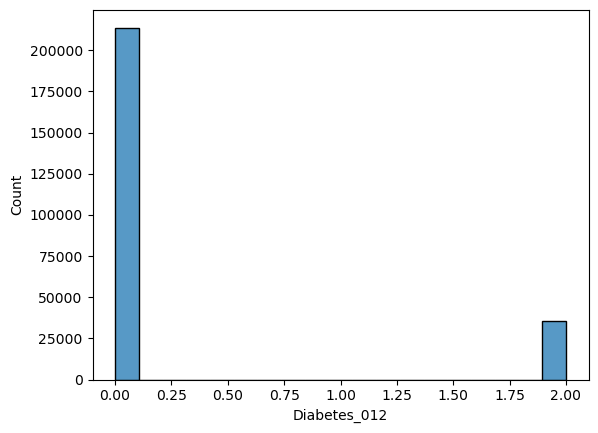

In [78]:
#seaborn.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
seaborn.histplot(data=diabetes, x= diabetes.Diabetes_012)
#diabetes[diabetes.Diabetes_012==0].shape()
diabetes.groupby(['Diabetes_012']).count()

<Axes: >

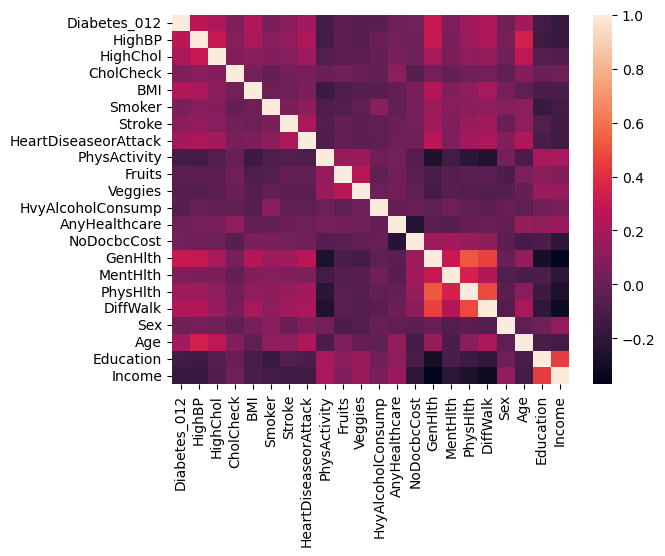

In [79]:
# checking variable correlation (need to avoid multicolinearities)
seaborn.heatmap(diabetes.corr(numeric_only=True))

In [80]:
diabetes['PhysHlth'].corr(diabetes['GenHlth'])  #.52
diabetes['PhysHlth'].corr(diabetes['DiffWalk']) #.478
diabetes['Education'].corr(diabetes['Income']) #.448
diabetes['DiffWalk'].corr(diabetes['GenHlth']) #.456


0.4562922808362167

## Correlation of variables
    The variable listed above have the highest correlation with each other. The variance inflation factor will need to be checked when implementing the logistic regression model. For the rest of the models this correlation should be fine. 

In [81]:
# data validation and training
# class imbalance
has_diabetes = diabetes.query('Diabetes_012 ==2')
has_diabetes['Diabetes_012'] = has_diabetes['Diabetes_012'].replace(2,1)
no_diabetes= diabetes.query('Diabetes_012 ==0').sample(n=35346)

C:\Users\corkr\AppData\Local\Temp\ipykernel_32276\1420219453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_diabetes['Diabetes_012'] = has_diabetes['Diabetes_012'].replace(2,1)


## Class Imbalance 
    First, the dataset contains more than enough observations to make an accurate model. For the sake of saving computation time only a portion of it will be used. This will be very beneficial in some of the models included in this project. The dataset also contains a class imbalance in the variable we want to predict which could influence the effectiveness of the models. To mitigate this the resulting sample is 50% of people who have diabetes and 50% of people of do not have diabetes. The final models will need to adjusted to the prior probability and thsi will be done at the end. 

In [82]:
#combine and split
Weighted_Sample = pd.concat([has_diabetes,no_diabetes]).reset_index(drop=True)
Weighted_Sample.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,0.0,1.0,0.0,1.0,29.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,5.0
70688,0.0,1.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,4.0,3.0
70689,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,5.0
70690,0.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0
70691,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,11.0,0.0,0.0,6.0,6.0,8.0


In [83]:
#Split into training and validation 
# random state set to 1 for reproducibility 
from sklearn.model_selection import train_test_split
train, test = train_test_split(Weighted_Sample, test_size=.3, random_state=1)

In [84]:
y = train['Diabetes_012']
x = train.loc[:, train.columns != 'Diabetes_012']

y_test = test['Diabetes_012']

x_test = test.loc[:, test.columns != 'Diabetes_012']

In [92]:
Evaluation = pd.DataFrame({
    "Model":[],
    "Accuracy":[], 
    "True Positive":[],
    "True Negative":[], 
    "False Positive":[],
    "False Negative":[],

})
Evaluation.head()

,Model,Accuracy,True Positive,True Negative,False Positive,False Negative


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)

                 Feature        VIF
0                 HighBP   3.075590
1               HighChol   2.484458
2              CholCheck  32.443862
3                    BMI  18.191731
4                 Smoker   2.030196
5                 Stroke   1.167436
6   HeartDiseaseorAttack   1.397621
7           PhysActivity   3.843818
8                 Fruits   2.856838
9                Veggies   5.166904
10     HvyAlcoholConsump   1.065855
11         AnyHealthcare  21.869546
12           NoDocbcCost   1.221510
13               GenHlth  13.022457
14              MentHlth   1.518693
15              PhysHlth   2.232615
16              DiffWalk   2.118427
17                   Sex   2.005223
18                   Age  12.365930
19             Education  27.219305
20                Income  12.245397


In [87]:
# removed variables with variance inflation factors higher than 10 
x1 = x.drop('Education', axis=1)
x1 = x1.drop('CholCheck', axis=1)
x1 = x1.drop('AnyHealthcare', axis=1)
x1 = x1.drop('BMI', axis=1)

x1_test = x_test.drop('Education', axis=1)
x1_test = x1_test.drop('CholCheck', axis=1)
x1_test = x1_test.drop('AnyHealthcare', axis=1)
x1_test = x1_test.drop('BMI', axis=1)

In [88]:
#logistic reg
import statsmodels.api as sm

x1 = sm.add_constant(x1)
log_model = sm.Logit(y,x1)
log_results = log_model.fit()

print(log_results.summary())

Optimization terminated successfully.
         Current function value: 0.531758
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:                49484
Model:                          Logit   Df Residuals:                    49466
Method:                           MLE   Df Model:                           17
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.2328
Time:                        18:34:58   Log-Likelihood:                -26314.
converged:                       True   LL-Null:                       -34299.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2758      0.073    -44.953      0.000      -3.419      -3.133

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x1_test = sm.add_constant(x1_test)

log_pred_prob = log_results.predict(x1_test)
# Convert probabilities to binary predictions
log_pred = [1 if x >= 0.5 else 0 for x in log_pred_prob]

conf_matrix_log = confusion_matrix(y_test, log_pred)

accuracy_log = accuracy_score(y_test, log_pred)
print("Confusion Matrix:")
print(conf_matrix_log)




# Extract TP, FP, FN, TN from confusion matrix
tn, fp, fn, tp = conf_matrix_log.ravel()

# Append results to the dataset
Evaluation = Evaluation._append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_log,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Confusion Matrix:
[[7558 2969]
 [2645 8036]]


In [94]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     10527
         1.0       0.73      0.75      0.74     10681

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



True positive 7475      false negative: 3052
False postive: 2636     True Negative: 8045


The logistic model has a low Psuedo R squared. 
NoDocBcCost could be removed with a p-value of .944
Veggies could be removed with a p-value of .492




In [109]:
#decision trees
# Gini index?
# https://www.geeksforgeeks.org/decision-tree-implementation-python/
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(random_state=1, criterion="gini")
gini_tree.fit(x, y)
gini_pred = gini_tree.predict(x_test)
accuracy = accuracy_score(y_test, gini_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
gini_conf = confusion_matrix(y_test, gini_pred)
print(gini_conf)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, gini_pred))




tn, fp, fn, tp = gini_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Decision Tree GINI",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.65

Confusion Matrix:
[[7037 3490]
 [3847 6834]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     10527
         1.0       0.66      0.64      0.65     10681

    accuracy                           0.65     21208
   macro avg       0.65      0.65      0.65     21208
weighted avg       0.65      0.65      0.65     21208



In [108]:
entropy_tree = DecisionTreeClassifier(random_state=1, criterion="entropy")
entropy_tree.fit(x,y)
entropy_pred = entropy_tree.predict(x_test)
accuracy = accuracy_score(y_test, entropy_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
entropy_conf = confusion_matrix(y_test, entropy_pred)
print(confusion_matrix(y_test, entropy_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, entropy_pred))


tn, fp, fn, tp = entropy_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Decision Tree Entropy",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.66

Confusion Matrix:
[[6995 3532]
 [3726 6955]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66     10527
         1.0       0.66      0.65      0.66     10681

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



In [42]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(5), (10, 5), (10, 5, 2)],
    'alpha': [0.001, 0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=200, random_state=1), param_grid, cv=5)
grid_search.fit(x, y)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (10, 5, 2)}
Best cross-validation score: 0.7532131030454424


In [107]:
nn = MLPClassifier(activation= 'relu', max_iter=200,
                    hidden_layer_sizes=(10,5, 2), random_state=1, alpha=.01)

nn.fit(x, y)

nn_pred = nn.predict(x_test)
# Print accuracy
accuracy = accuracy_score(y_test, nn_pred)
print("Accuracy:", accuracy_score(y_test, nn_pred))
nn_conf  = confusion_matrix(y_test, nn_pred)
print(nn_conf)
# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, nn_pred))

tn, fp, fn, tp = nn_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Neural Network",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)


Accuracy: 0.752640513013957
[[7478 3049]
 [2197 8484]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     10527
         1.0       0.74      0.79      0.76     10681

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [106]:
#boosting
# https://www.geeksforgeeks.org/ml-gradient-boosting/#
from sklearn.ensemble import GradientBoostingClassifier

gradb_clf = GradientBoostingClassifier(
    n_estimators=25,    # Number of boosting stages
    learning_rate=0.1,   # Step size to control each model's contribution
    max_depth=3,         # Depth of each tree
    random_state=1
)

# Train the model
gradb_clf.fit(x, y)

# Predict on the test set
gradb_pred = gradb_clf.predict(x_test)
accuracy = accuracy_score(y_test, gradb_pred)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, gradb_pred))
gradb_conf = confusion_matrix(y_test,gradb_pred )
print("Classification Report:\n", classification_report(y_test, gradb_pred))

tn, fp, fn, tp = gradb_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7467465107506601
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.74     10527
         1.0       0.73      0.78      0.76     10681

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [105]:
#bagging
# https://www.geeksforgeeks.org/ml-bagging-classifier/

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    
    n_estimators=50,      # Number of base estimators
    max_samples=0.8,      # Proportion of dataset to use per subset (80% here)
    max_features=1.0,     # Proportion of features to use per subset (all features)
    random_state=1
)

# Train the model
bagging_clf.fit(x, y)

# Predict on test set
y_pred = bagging_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
bag_conf = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

tn, fp, fn, tp = bag_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Bagging",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7277913994718974
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     10527
         1.0       0.72      0.75      0.73     10681

    accuracy                           0.73     21208
   macro avg       0.73      0.73      0.73     21208
weighted avg       0.73      0.73      0.73     21208



In [104]:
#random forest
# https://www.geeksforgeeks.org/random-forest-regression-in-python/#
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
x_categorical = x.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = x.select_dtypes(exclude=['object']).values
x_adj = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

x_categorical = x_test.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = x_test.select_dtypes(exclude=['object']).values
x_test_adj = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
rf = RandomForestRegressor(n_estimators=50, random_state=1, oob_score=True)

# Fit the regressor with x and y data
rf.fit(x_adj, y)

rf_pred = rf.predict(x_test_adj)

rf_pred = [1 if x >= 0.5 else 0 for x in rf_pred]
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy}")
rf_conf = confusion_matrix(y_test, rf_pred)
print(confusion_matrix(y_test, rf_pred))

tn, fp, fn, tp = rf_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)


Accuracy: 0.7252923425122595
[[7244 3283]
 [2543 8138]]


In [103]:
#k nearest neighbors
# principle component analysis before clustering?
# https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
scaled_features = scaler.transform(x)

df_feat = pd.DataFrame(scaled_features,
					columns=x.columns[:])
df_feat.head()

from sklearn.neighbors import KNeighborsClassifier


# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
knn_pred = knn.predict(x_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
knn_conf = confusion_matrix(y_test, knn_pred)
print(confusion_matrix(y_test, knn_pred))
accuracy = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

tn, fp, fn, tp = knn_conf.ravel()

Evaluation = Evaluation._append({
    "Model": "KNN",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)


[[6929 3598]
 [3705 6976]]
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65     10527
         1.0       0.66      0.65      0.66     10681

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



In [111]:
Evaluation

,Model,Accuracy,True Positive,True Negative,False Positive,False Negative,True Positive (TP),False Positive (FP),False Negative (FN),True Negative (TN)
0,KNN,0.655649,NaN,NaN,NaN,NaN,6976.0,3598.0,3705.0,6929.0
1,Random Forest,0.725292,NaN,NaN,NaN,NaN,8138.0,3283.0,2543.0,7244.0
2,Bagging,0.727791,NaN,NaN,NaN,NaN,7971.0,3063.0,2710.0,7464.0
3,Gradient Boosting,0.746747,NaN,NaN,NaN,NaN,8313.0,3003.0,2368.0,7524.0
4,Neural Network,0.752641,NaN,NaN,NaN,NaN,8484.0,3049.0,2197.0,7478.0
5,Decision Tree Entropy,0.657771,NaN,NaN,NaN,NaN,6955.0,3532.0,3726.0,6995.0
6,Decision Tree GINI,0.654046,NaN,NaN,NaN,NaN,6834.0,3490.0,3847.0,7037.0
7,Logistic Regression,0.735289,8036.0,7558.0,2969.0,2645.0,NaN,NaN,NaN,NaN


## 50/50 Split evaluation 
    An accuracy of 65% to 75% is better than nothing but not that great. The real test is to see if the models do well with the ogirinal dataset. 


In [ ]:
new_x_test = 
new_y_test = 